# Consistency by Thibaut Louis

First a transfer function

$
\begin{align}
\tilde{a}_{\ell,m}^{T} &= a_{\ell,m}^{T}\\
\tilde{a}_{\ell,m}^{E} &= F_\ell a_{\ell,m}^{E}\\
\end{align}
$

which give

$
\begin{align}
\tilde{C}_\ell^{TT} &= C_\ell^{TT}\\
\tilde{C}_\ell^{TE} &= F_\ell C_\ell^{TT}\\
\tilde{C}_\ell^{EE} &= F_\ell^2C_\ell^{EE}
\end{align}
$

Then a leakage model

$
\begin{align}
\tilde{a}_{\ell,m}^{T} &= a_{\ell,m}^{T}\\
\tilde{a}_{\ell,m}^{E} &= a_{\ell,m}^{E} + \beta_\ell a_{\ell,m}^{T}\\
\end{align}
$

giving

$
\begin{align}
\tilde{C}_\ell^{TT} &= C_\ell^{TT}\\
\tilde{C}_\ell^{TE} &= C_\ell^{TE} + \beta_\ell C_\ell^{TT}\\
\tilde{C}_\ell^{EE} &= C_\ell^{EE} + 2\beta_\ell C_\ell^{TE} + \beta_\ell^2C_\ell^{TT}
\end{align}
$

We can also try to add some independant nuisance to EE mode with the following model

$
\begin{align}
\tilde{C}_\ell^{TT} &= C_\ell^{TT}\\
\tilde{C}_\ell^{TE} &= C_\ell^{TE}\\
\tilde{C}_\ell^{EE} &= \alpha_\ell C_\ell^{EE}
\end{align}
$

## Preamble

This notebook make use of [GetDist](https://getdist.readthedocs.io/en/latest/) python package to plot and to analyse MCMC samples.



In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

Print versions used



In [2]:
import getdist
import matplotlib

getdist.chains.print_load_details = False

print("     Numpy :", np.__version__)
print("Matplotlib :", matplotlib.__version__)
print("   GetDist :", getdist.__version__)

     Numpy : 1.20.1
Matplotlib : 3.3.4
   GetDist : 1.1.3


## Definitions

Define CMB & nuisance parameter names.



In [3]:
cosmo_params = ["cosmomc_theta", "logA", "ns", "ombh2", "omch2", "H0", "tau"]
polareff_params = lambda n: [f"yp{i}" for i in range(n)]
leakage_params = lambda n: [f"bl{i}" for i in range(n)]
ee_crap_params = lambda n: [f"ap{i}" for i in range(n)]

Set a dictionnary holding the path to the MCMC chains and its name

In [4]:
act_samples = {
    "ACTPol (DR4) - TE+EE": "data/act/te_ee",
    "ACTPol (DR4) - TT+TE+EE": "data/act/tt_te_ee",
    "ACTPol (DR4) - TE+EE - polar eff.": "data/act/polareff/te_ee",
    "ACTPol (DR4) - TT+TE+EE - polar eff.": "data/act/polareff/tt_te_ee",
    "ACTPol (DR4) - TE+EE - TE leakage": "data/act/leakage/te_ee",
    "ACTPol (DR4) - TT+TE+EE - TE leakage": "data/act/leakage/tt_te_ee",
    "ACTPol (DR4) - TE+EE - EE crap": "data/act/crap/te_ee",
    "ACTPol (DR4) - TT+TE+EE - EE crap": "data/act/crap/tt_te_ee",
}
planck_samples = {
    "Planck 2018 - TE+EE": "data/planck/te_ee",
    "Planck 2018 - TT+TE+EE": "data/planck/tt_te_ee",
    "Planck 2018 - TE+EE - polar eff.": "data/planck/polareff/te_ee",
    "Planck 2018 - TT+TE+EE - polar eff.": "data/planck/polareff/tt_te_ee",
    "Planck 2018 - TE+EE - TE leakage": "data/planck/leakage/te_ee",
    "Planck 2018 - TT+TE+EE - TE leakage": "data/planck/leakage/tt_te_ee",
    "Planck 2018 - TE+EE - EE crap": "data/planck/crap/te_ee",
    "Planck 2018 - TT+TE+EE - EE crap": "data/planck/crap/tt_te_ee",
}
planck_act_samples = {
    "Planck 2018 TT + ACTPol (DR4) TE+EE": "data/planck+act/default/tt_te_ee",
    "Planck 2018 TT + ACTPol (DR4) TE+EE - polar eff.": "data/planck+act/polareff/tt_te_ee",
    "Planck 2018 TT + ACTPol (DR4) TE+EE - TE leakage": "data/planck+act/leakage/tt_te_ee",
    "Planck 2018 TT + ACTPol (DR4) TE+EE - EE crap": "data/planck+act/crap/tt_te_ee",
}
mcmc_samples = {**act_samples, **planck_samples, **planck_act_samples}
crap_samples = {k: v for k, v in mcmc_samples.items() if "crap" in k}

## MCMC chains

Let's plot the chains size

In [34]:
from cobaya_utilities.tools import print_chains_size

print_chains_size(planck_act_samples)

,mcmc 1,mcmc 2,mcmc 3,mcmc 4,total
Planck 2018 TT + ACTPol (DR4) TE+EE,11606,12432,12514,11236,47788
Planck 2018 TT + ACTPol (DR4) TE+EE - polar eff.,33956,29172,34550,33550,131228
Planck 2018 TT + ACTPol (DR4) TE+EE - TE leakage,34823,36256,62204,63307,196590
Planck 2018 TT + ACTPol (DR4) TE+EE - EE crap,62193,62760,64677,0,189630


Have a look at how chains evolve with time and check convergence or not.



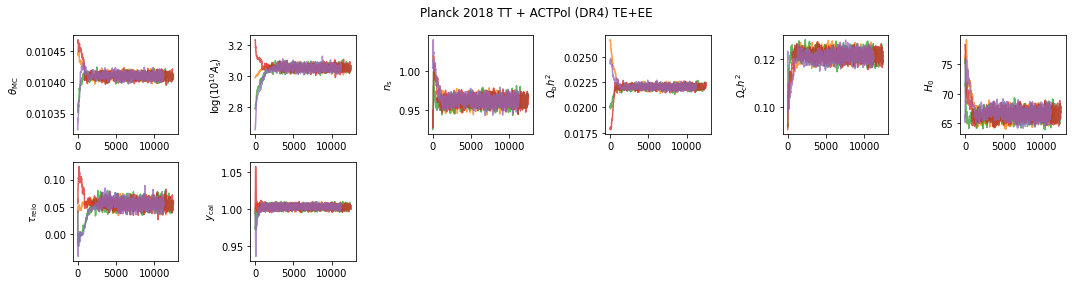

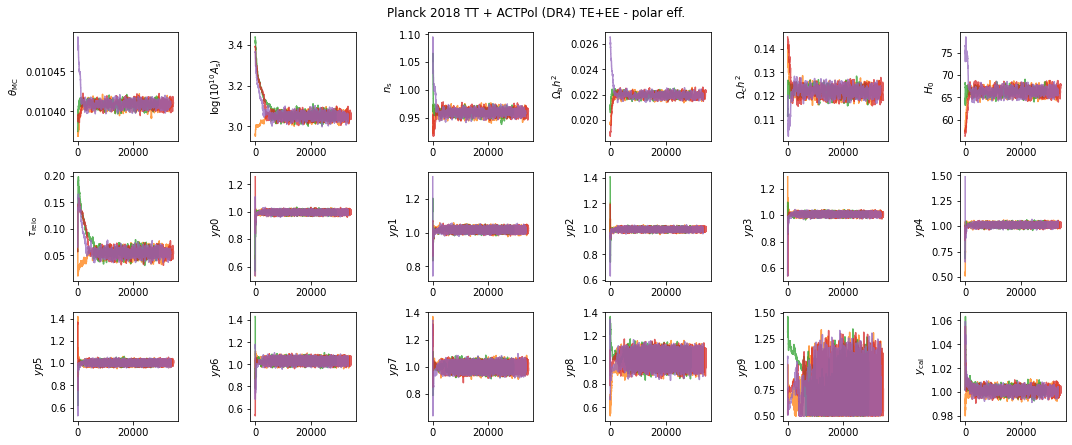

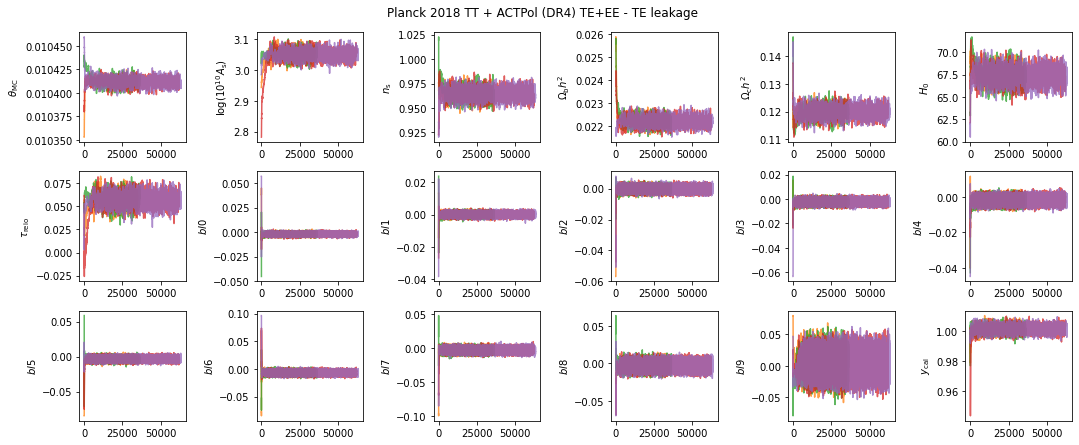

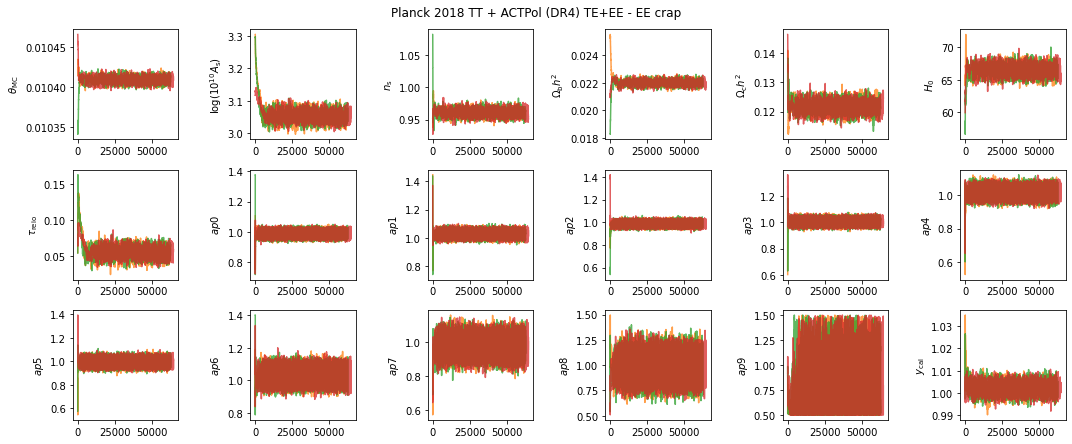

In [35]:
from cobaya_utilities.tools import plot_chains

for k, v in planck_act_samples.items():
    n = 10 if "ACTPol" in k else 20
    nuisance_params = []
    if "polar eff." in k:
        nuisance_params = polareff_params(n)
    elif "leakage" in k:
        nuisance_params = leakage_params(n)
    elif "crap" in k:
        nuisance_params = ee_crap_params(n)
    nuisance_params += ["A_planck"] if "Planck" in k else []
    plot_chains(v, params=cosmo_params + nuisance_params, title=k, ncol=6)

Let's plot also the Gelman $R-1$ parameter and acceptance rate progress

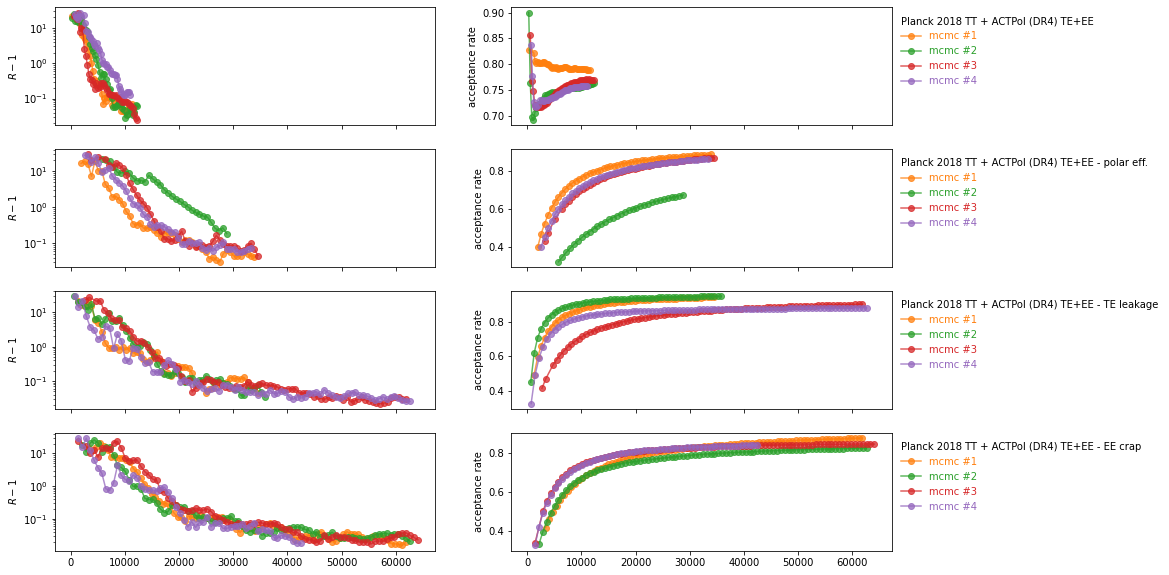

In [36]:
from cobaya_utilities.tools import plot_progress

plot_progress(planck_act_samples)

## MCMC distributions



Define global plot settings

In [8]:
from getdist.plots import GetDistPlotSettings

plot_settings = GetDistPlotSettings()
plot_settings.num_plot_contours = 3
plot_settings.solid_colors = "tab20"
plot_settings.line_styles = "tab20"
plot_settings.legend_fontsize = 15

Load MCMC samples



In [38]:
from getdist import loadMCSamples

samples = [
    loadMCSamples(os.path.join(path, "mcmc"), settings={"ignore_rows": 0.4})
    for path in mcmc_samples.values()
]

Plot posteriors distributions of CMB parameters



In [10]:
colors = (
    ["grey", "black"]
    + [plt.get_cmap("tab20")(i) for i in [1, 0, 5, 4, 17, 16]]
    + ["gray", "black"]
    + [plt.get_cmap("tab20")(i) for i in [3, 2, 7, 6, 9, 8]]
    + ["gray"]
    + [plt.get_cmap("tab20b")(i) for i in [1, 5, 9]]
)


def get_sample_range(keywords):
    import re

    r = re.compile(keywords)
    return [i for i, k in enumerate(mcmc_samples.keys()) if r.match(k)]


def triangle_plot(sample_range, params, show_tau_prior=True):
    from getdist import plots

    g = plots.get_subplot_plotter(settings=plot_settings)
    legend_labels = [k for i, k in enumerate(mcmc_samples.keys()) if i in sample_range]
    ssamples = [sample for i, sample in enumerate(samples) if i in sample_range]
    ccolors = [color for i, color in enumerate(colors) if i in sample_range]
    g.triangle_plot(
        ssamples,
        params,
        filled=False,
        legend_labels=legend_labels,
        colors=ccolors,
        diag1d_kwargs={"colors": ccolors},
    )
    if show_tau_prior:
        # Show prior on tau
        from scipy.stats import norm

        ax = g.subplots[-1, -1]
        xmin, xmax, ymin, ymax = ax.axis()
        x = np.linspace(xmin, xmax, 100)
        y = norm.pdf(x, 0.054, 0.0073)

        ax.plot(x, y / np.max(y), color="gray", ls="--", label=r"$\tau$ prior")
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1));

Plot posteriors distributions of parameters

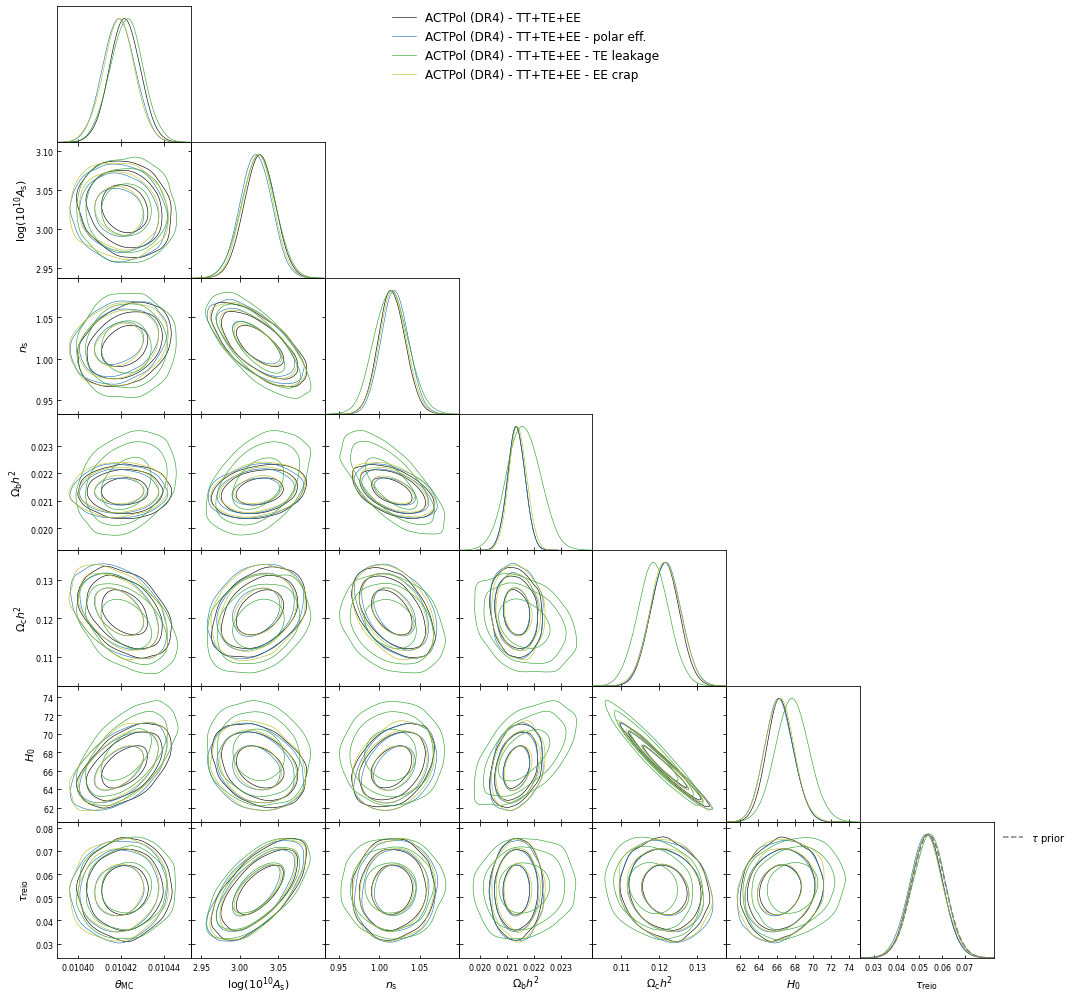

In [11]:
triangle_plot(sample_range=get_sample_range("ACTPol.*TT\+"), params=cosmo_params)

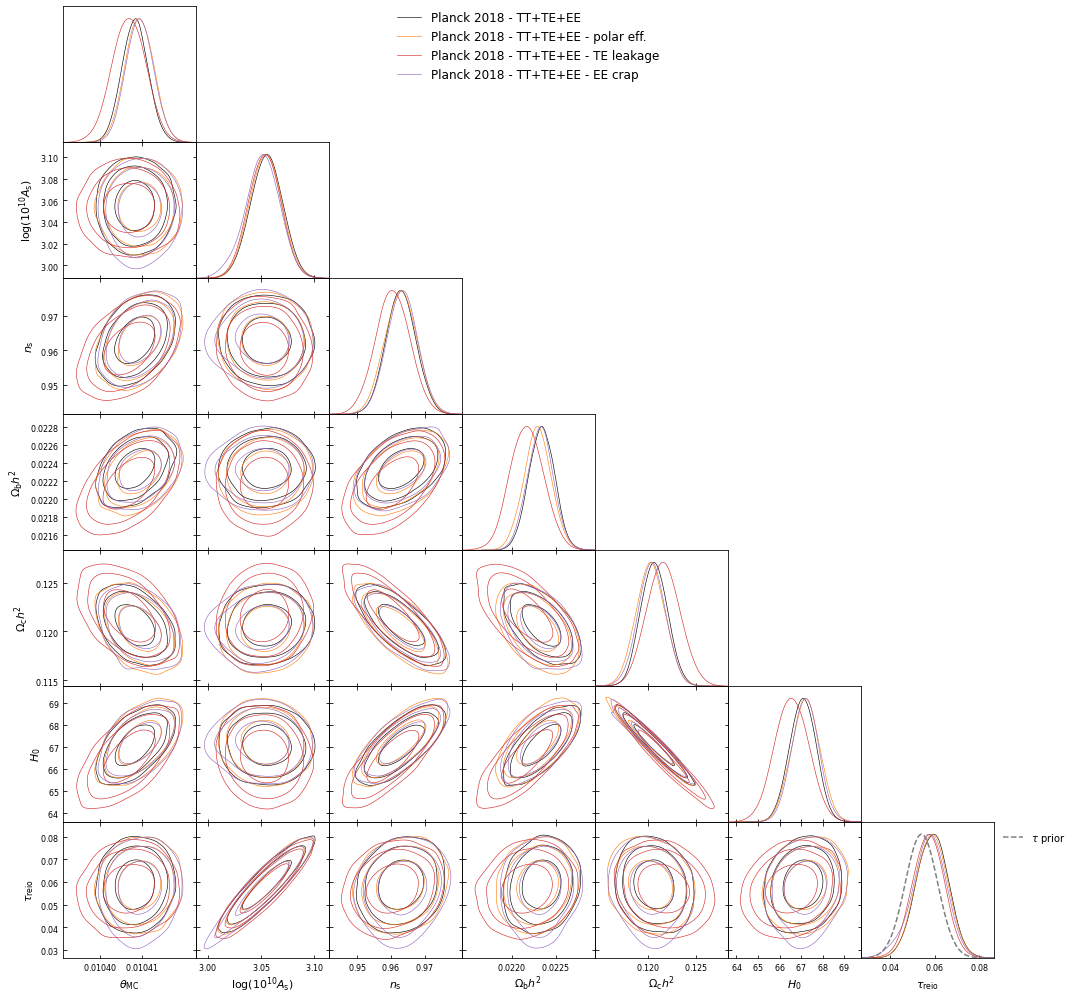

In [12]:
triangle_plot(sample_range=get_sample_range("Planck.*TT\+"), params=cosmo_params)

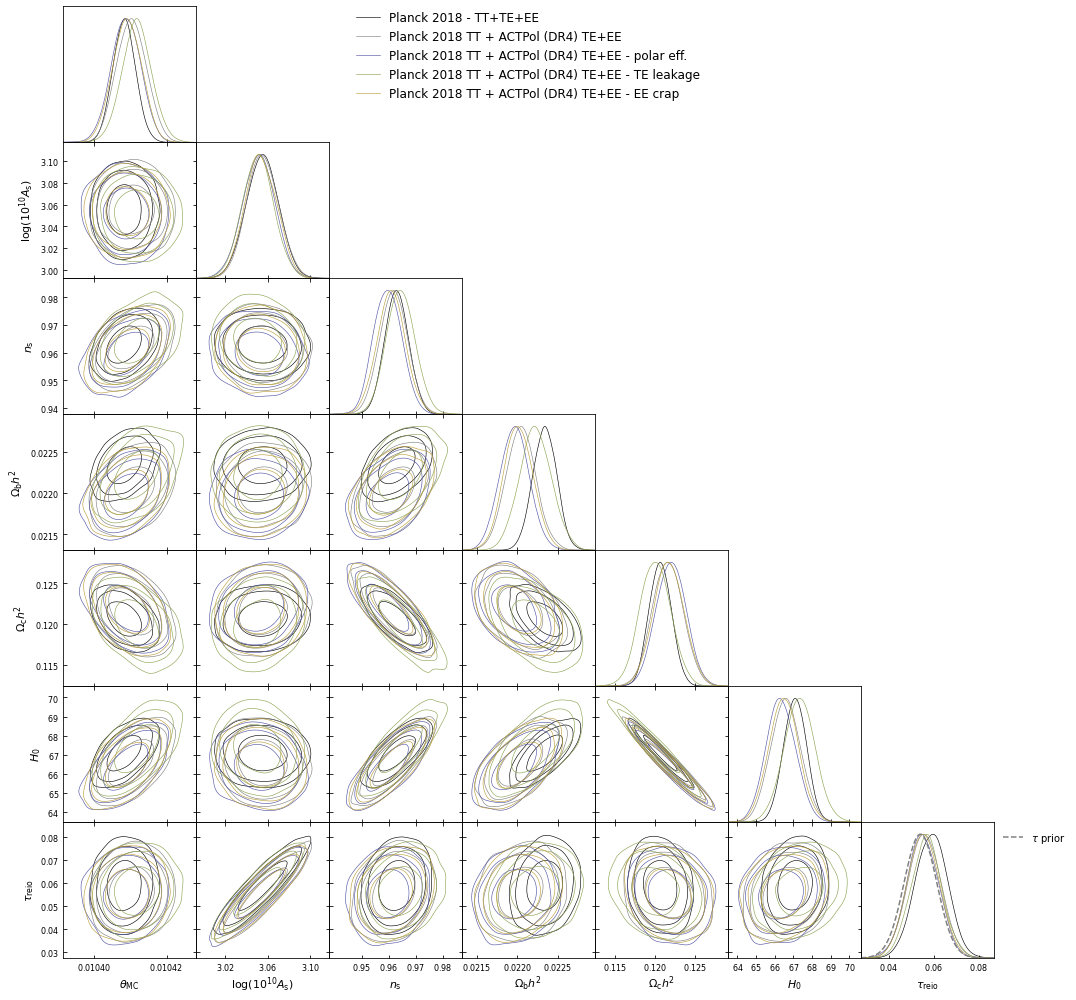

In [39]:
triangle_plot(
    sample_range=get_sample_range("Planck.*TT\+TE\+EE$") + get_sample_range("Planck.*ACTPol"),
    params=cosmo_params,
)

### Correlation plots

In [14]:
def rectangle_plot(sample_range, params1, params2):
    from getdist import plots

    g = plots.get_subplot_plotter(settings=plot_settings)
    legend_labels = [k for i, k in enumerate(mcmc_samples.keys()) if i in sample_range]
    roots = [sample for i, sample in enumerate(samples) if i in sample_range]
    ccolors = [color for i, color in enumerate(colors) if i in sample_range]
    g.rectangle_plot(
        params1,
        params2,
        roots=roots,
        filled=True,
        legend_labels=legend_labels,
        colors=ccolors,
    );

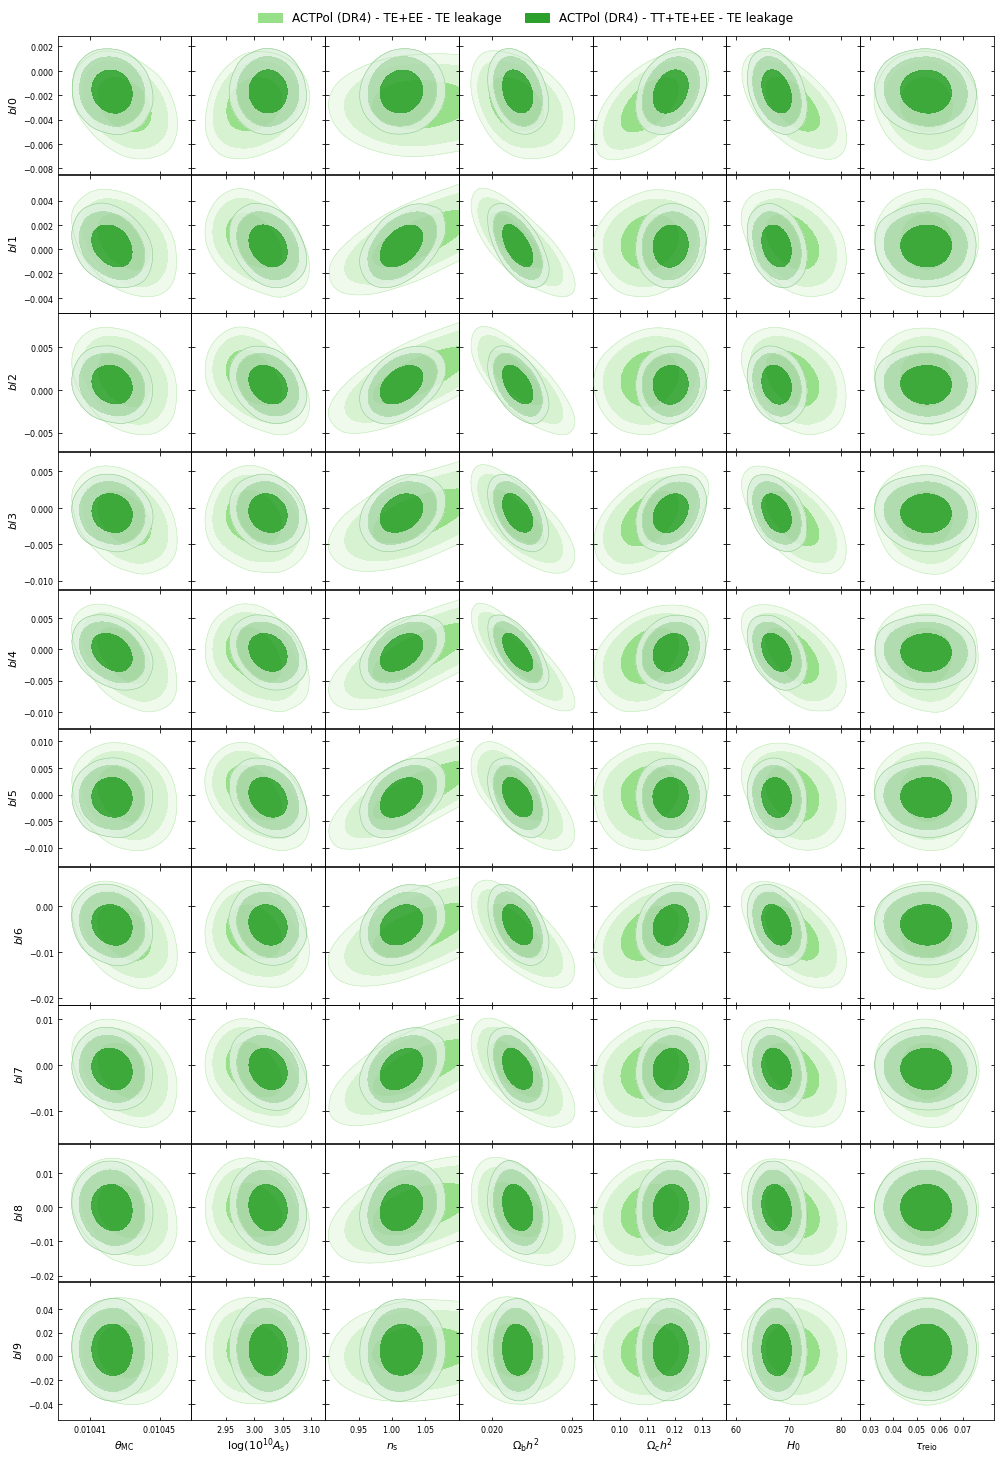

In [15]:
rectangle_plot(get_sample_range("ACTPol.*TE leakage"), params1=cosmo_params, params2=leakage_params(10))

In [16]:
def plot_correlation(sample_range, sharey=True):
    ssamples = [sample for i, sample in enumerate(samples) if i in sample_range]
    labels = [k for i, k in enumerate(mcmc_samples.keys()) if i in sample_range]
    fig, axes = plt.subplots(1, len(labels), figsize=(8 * len(labels), 8), sharey=sharey)
    if len(sample_range) == 1:
        axes = np.array([axes])
    for i, ax in enumerate(axes):
        covmat = ssamples[i].getCovMat()
        params = [f"${ssamples[i].parLabel(param)}$" for param in covmat.paramNames]
        im = ax.imshow(covmat.correlation(), cmap="RdBu", vmin=-1, vmax=+1)
        ax.set_xticks(np.arange(len(params)))
        ax.set_xticklabels(params, rotation="vertical")
        ax.set_yticks(np.arange(len(params)))
        ax.set_yticklabels(params)
        ax.set_title(labels[i])
        asp = np.diff(axes[0].get_xlim())[0] / np.diff(axes[0].get_ylim())[0]
        ax.set_aspect(1 / np.abs(asp))
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.25, 0.025, 0.5])
    fig.colorbar(im, cax=cbar_ax);

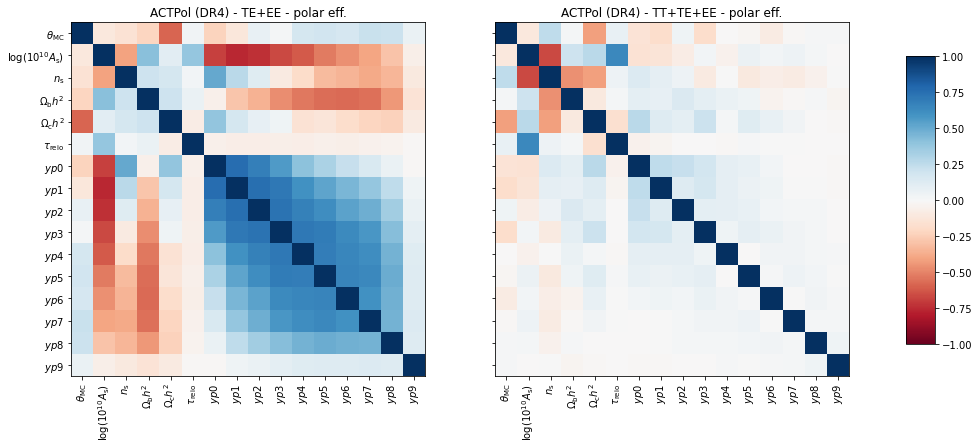

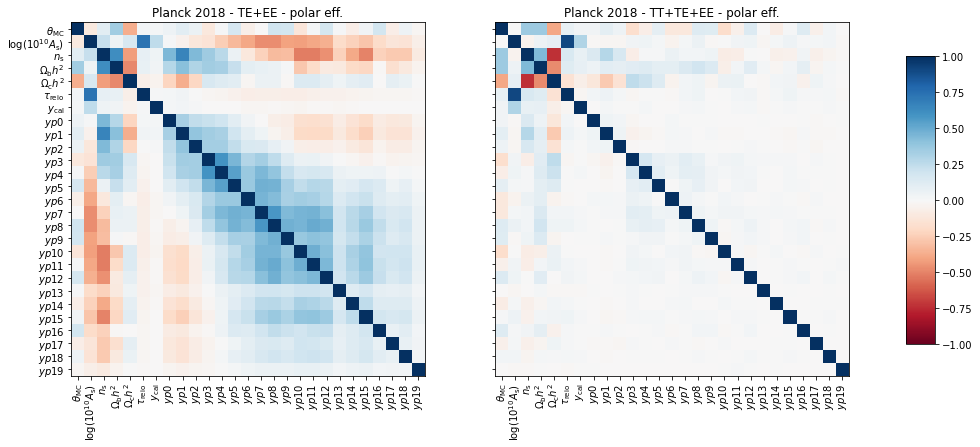

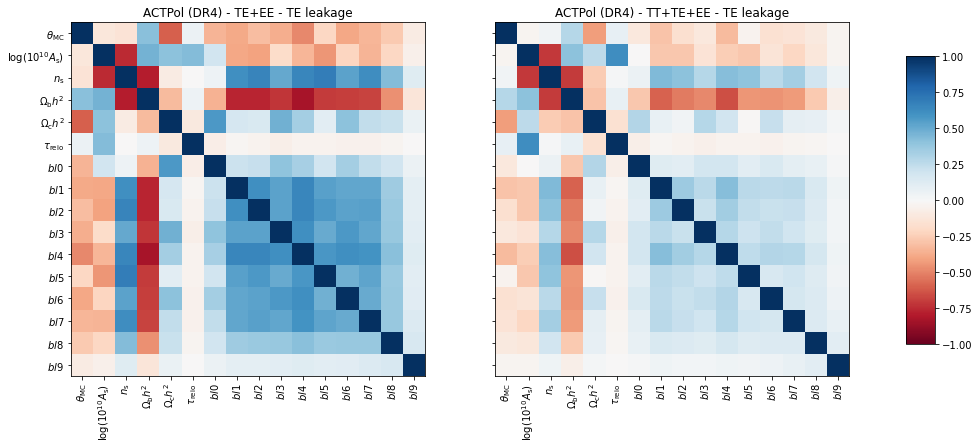

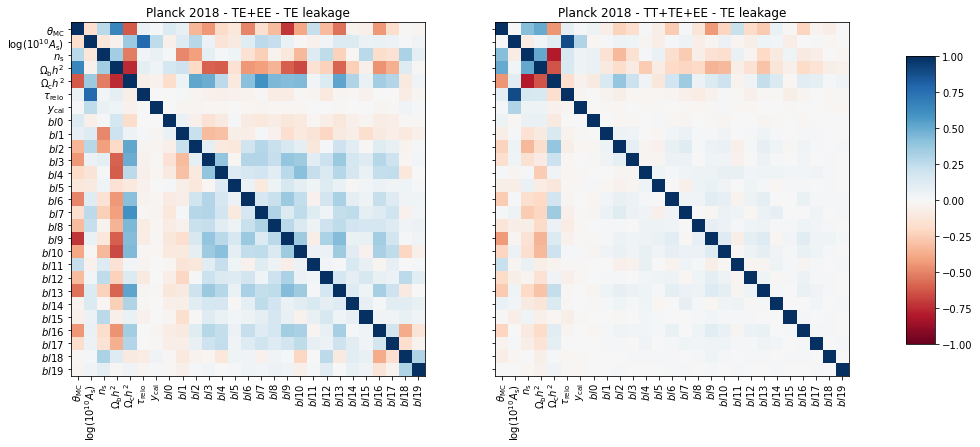

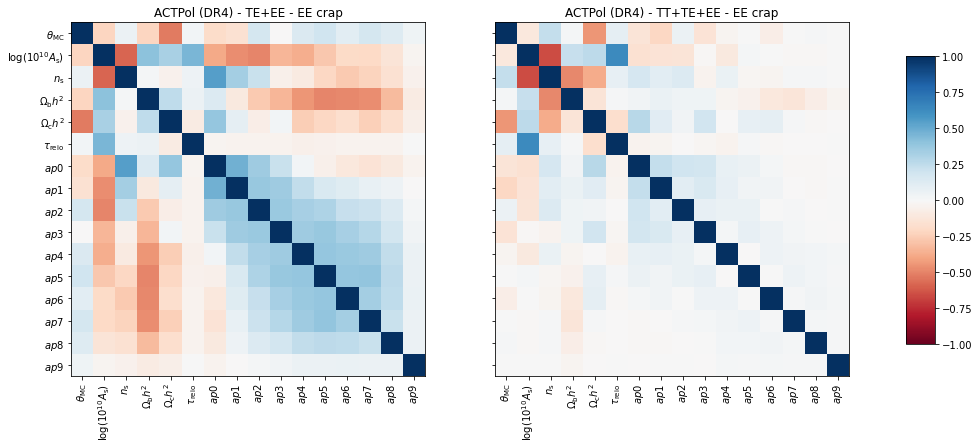

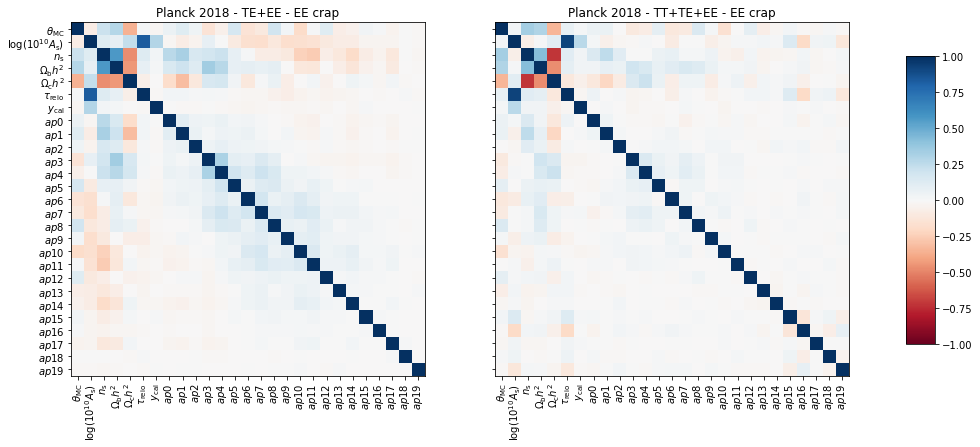

In [17]:
from itertools import product

for nuisance, exp in product(["polar", "leakage", "crap"], ["ACTPol", "Planck"]):
    plot_correlation(get_sample_range(f"{exp}.*-.*TE\+EE.*{nuisance}"))

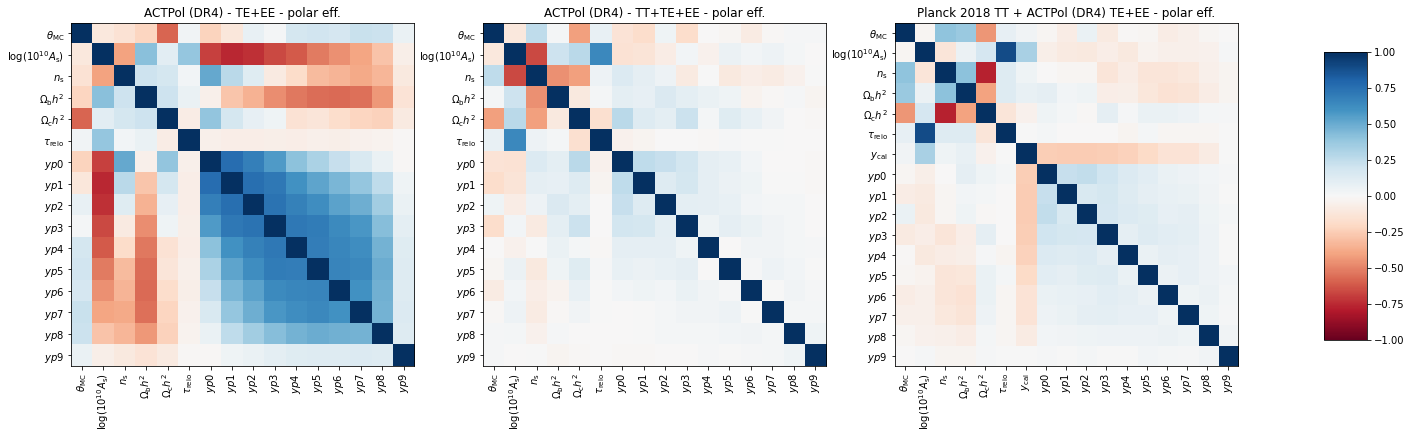

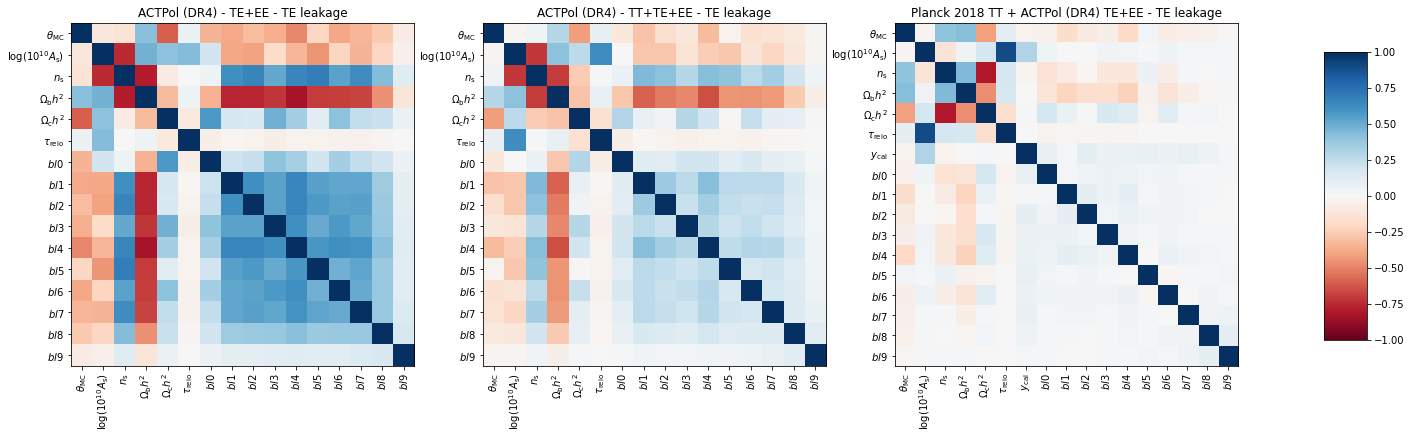

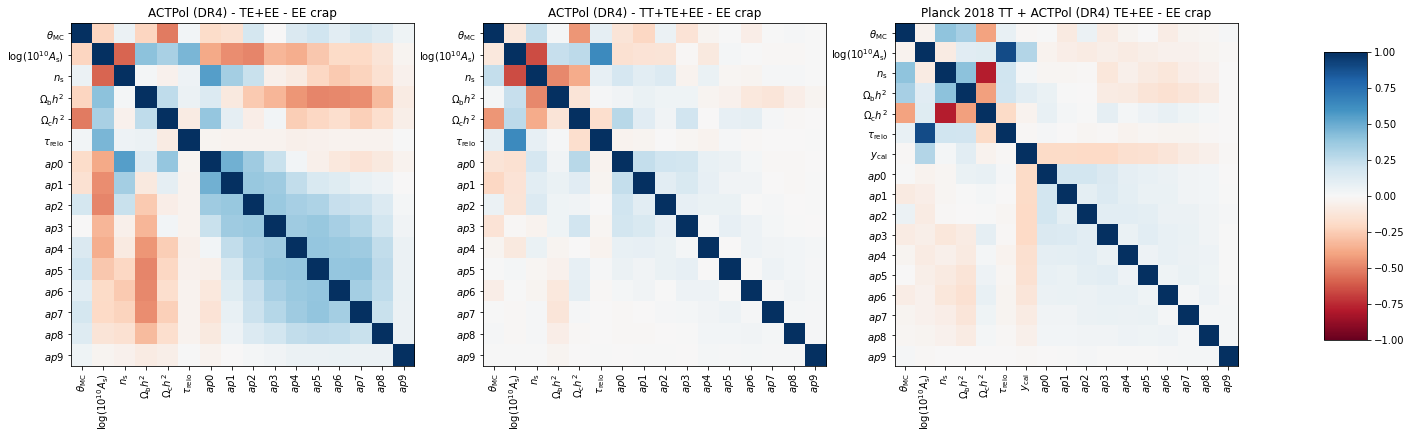

In [40]:
for nuisance, exp in product(["polar", "leakage", "crap"], ["ACTPol"]):
    plot_correlation(get_sample_range(f".*{exp}.*{nuisance}"), sharey=False)

### Results

In [19]:
import ipywidgets as widgets


def show_table(sample_range, params):
    labels = [k for i, k in enumerate(mcmc_samples.keys()) if i in sample_range]
    ssamples = [sample for i, sample in enumerate(samples) if i in sample_range]

    return widgets.HBox(
        [
            widgets.VBox(
                [
                    widgets.HTML(f"<big><b>{label}</b></big>"),
                    widgets.Image(
                        value=sample.getTable(limit=1, paramList=params + ["chi2"])
                        .tablePNG(dpi=150, bytesIO=True)
                        .read()
                    ),
                ]
            )
            for sample, label in zip(ssamples, labels)
        ]
    )

In [20]:
show_table(get_sample_range("ACTPol.*TT"), params=cosmo_params)

In [21]:
def plot_results(sample_range, params):
    labels = [k for i, k in enumerate(mcmc_samples.keys()) if i in sample_range]
    ssamples = [sample for i, sample in enumerate(samples) if i in sample_range]
    ccolors = [color for i, color in enumerate(colors) if i in sample_range]

    fig, axes = plt.subplots(1, len(params), sharey=True, figsize=(20, 7))
    plt.subplots_adjust(hspace=0, wspace=0.15)

    for i, ax in enumerate(axes):
        ax.spines["left"].set_color(None)
        ax.spines["right"].set_color(None)
        ax.spines["top"].set_color(None)
        ax.tick_params(bottom="off")
        ax.set_yticks([])
        if params[i] == "tau":
            ax.axvspan(0.054 - 0.0073, 0.054 + 0.0073, color="0.9")

        for j, (sample, color) in enumerate(zip(ssamples, ccolors)):
            try:
                x = sample.mean(params[i])
                xerr = sample.std(params[i])
            except:
                continue
            if ax.get_xlabel() == "":
                ax.set_xlabel(f"${sample.parLabel(params[i])}$")
            ax.errorbar(x, y=j, xerr=xerr, fmt="o", color=color)

    for i, (label, color) in enumerate(zip(labels, ccolors)):
        axes[0].text(
            0,
            (i + 1) / (len(sample_range) + 1),
            label,
            ha="right",
            va="center",
            color=color,
            transform=axes[0].transAxes,
        )

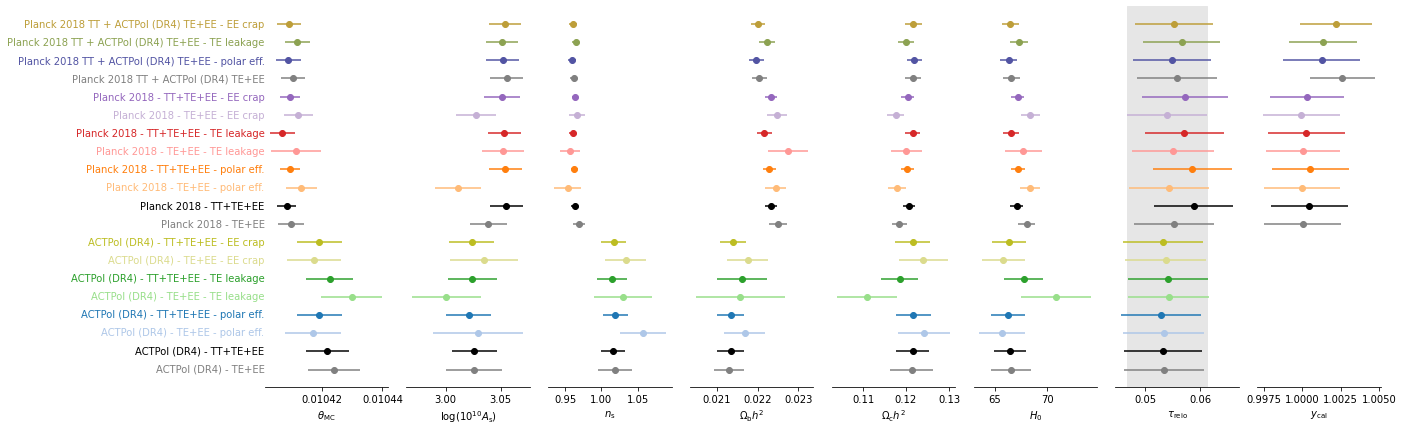

In [41]:
plot_results(get_sample_range(".*"), params=cosmo_params + ["A_planck"])

In [30]:
from scipy import stats

actpol_ell_range = (576, 4325)
planck_ell_range = (30, 1996)


def plot_params(sample_range):
    labels = [k for i, k in enumerate(mcmc_samples.keys()) if i in sample_range]
    ssamples = [sample for i, sample in enumerate(samples) if i in sample_range]
    ccolors = [color for i, color in enumerate(colors) if i in sample_range]

    fig = plt.figure(figsize=(10, 8))
    gs = plt.GridSpec(4, 1)
    main = plt.subplot(gs[:3], xticklabels=[])
    dev = plt.subplot(gs[-1])
    for sample, label, color in zip(ssamples, labels, ccolors):
        if "ACTPol" in label:
            ell_range = actpol_ell_range
            n = 10
        elif "Planck" in label:
            ell_range = planck_ell_range
            n = 20
        if "polar eff." in label:
            params = polareff_params(n)
            expected = 1.0
        elif "leakage" in label:
            params = leakage_params(n)
            expected = 0.0
        elif "crap" in label:
            params = ee_crap_params(n)
            expected = 1.0
        x = np.linspace(*ell_range, len(params) + 1)
        x = x[:-1] + np.diff(x) / 2
        y = sample.mean(params)
        yerr = sample.std(params)
        chi2 = np.sum((y - expected) ** 2 / yerr ** 2)
        label = f"{label} - $\chi^2$/ndof = {chi2:.2f}/{len(x)} - PTE = {stats.chi2.sf(chi2, len(x)):.2f}"
        main.errorbar(x, y, yerr=yerr, fmt="o", label=label, color=color)
        dev.errorbar(x, (y - expected) / yerr, fmt="o", color=color)
    main.axhline(expected, color="gray", ls="--")
    main.legend(labelcolor=ccolors, loc="upper left", bbox_to_anchor=(1, 1))
    dev.set_xlabel(r"$\ell$")
    dev.set_ylabel(r"$\sigma$")
    dev.axhspan(-1, 1, color="0.9")
    dev.set_ylim(-3, 3)

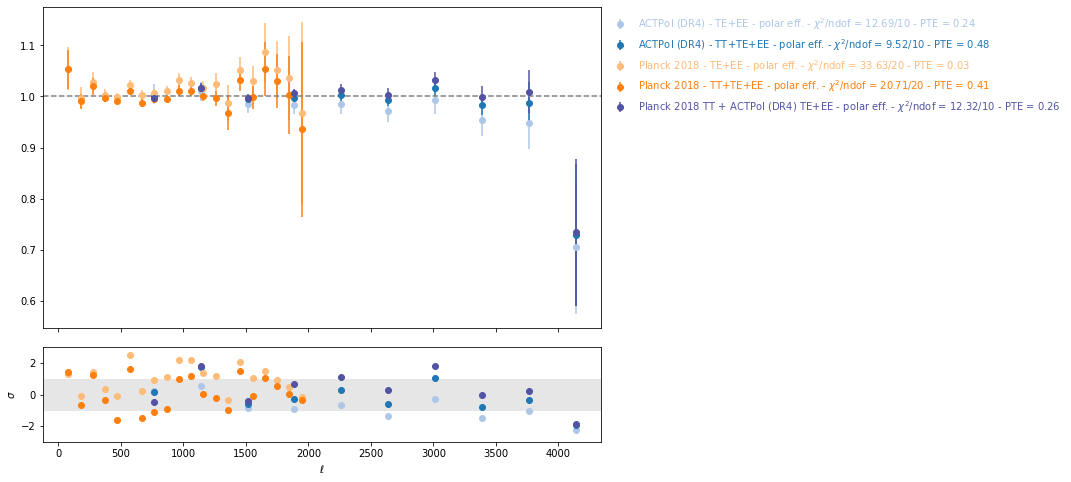

In [42]:
plot_params(get_sample_range(".*polar"))

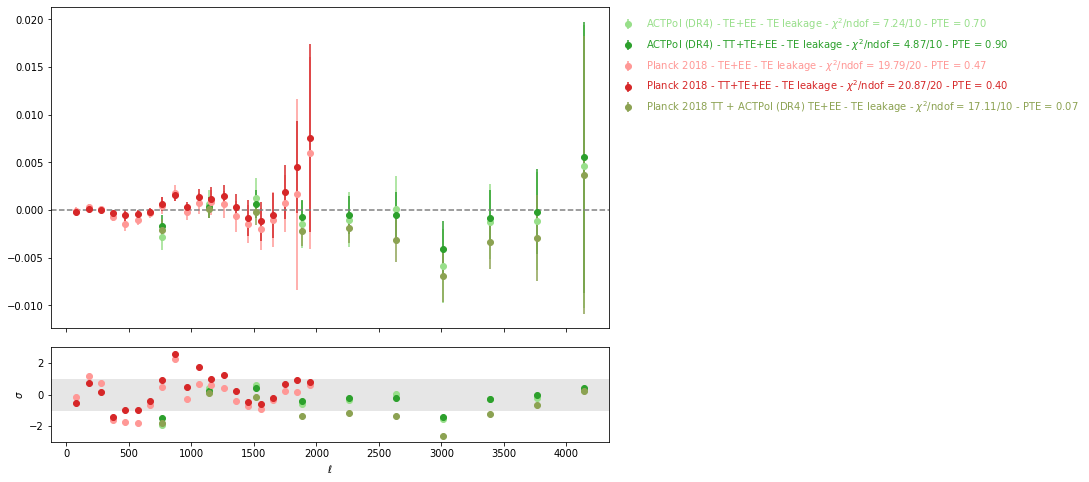

In [43]:
plot_params(get_sample_range(".*leakage"))

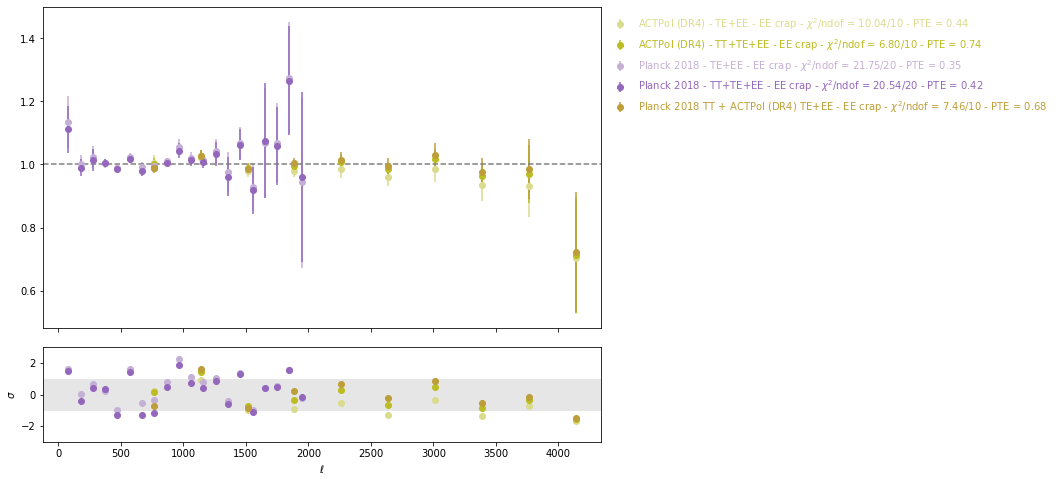

In [44]:
plot_params(get_sample_range(".*crap"))